<a href="https://colab.research.google.com/github/datapixer/Precipitation-Forecasting-Using-a-Stacked-Recurrent-Neural-Network/blob/main/Script_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Set your Google Cloud Project ID
project_id = 'datapixer-454619'

In [ ]:
from google.cloud import bigquery
# Create a BigQuery client
client = bigquery.Client(project=project_id)

In [ ]:
query = """
  SELECT *
  FROM `datapixer-454619.Precipitation_Data.DATA`
  ORDER BY DATE ASC
        """

In [ ]:
query_job = client.query(query)

In [ ]:
import pandas as df
df = query_job.to_dataframe()
df

,DATE,PRECIPITATION,SEA_SURFACE_TEMPERATURE
0,1915-01-01,436.1,23.818490
1,1915-02-01,425.4,25.059683
2,1915-03-01,366.2,24.509335
3,1915-04-01,108.5,23.403187
4,1915-05-01,113.4,21.270353
...,...,...,...
1274,2021-03-01,307.4,23.945781
1275,2021-04-01,103.0,22.374807
1276,2021-05-01,8.0,21.562235
1277,2021-06-01,2.0,20.821750


In [ ]:
import numpy as np
import random
import xgboost as xgb
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
import pandas as pd
DATA = df
DATA.DATE = pd.to_datetime(DATA.DATE)
DATA = DATA.set_index('DATE')

In [ ]:
n = 6
end = max(DATA.index)
start = max(DATA.index) + pd.DateOffset(months=1)
dates = pd.date_range(start=start, periods = n, freq='MS')
random.seed(123)
xmodel = ExponentialSmoothing(DATA.SEA_SURFACE_TEMPERATURE, trend = 'additive',seasonal = 'additive',damped_trend = True,seasonal_periods = 12, freq='MS').fit()

In [ ]:
S = pd.DataFrame({'Xt': DATA.SEA_SURFACE_TEMPERATURE})
S = pd.concat([S,pd.DataFrame({'Xt':xmodel.forecast(n)})])
S['Xt-1']  = S.Xt.shift(1)
S['Xt-2']  = S.Xt.shift(2)
S['Xt-3']  = S.Xt.shift(3)
S['Xt-4']  = S.Xt.shift(4)
S['Xt-5']  = S.Xt.shift(5)
S['Xt-6']  = S.Xt.shift(6)
S['Xt-7']  = S.Xt.shift(7)
S['Xt-8']  = S.Xt.shift(8)
S['Xt-9']  = S.Xt.shift(9)
S['Xt-10'] = S.Xt.shift(10)
S['Xt-11'] = S.Xt.shift(11)
S['Xt-12'] = S.Xt.shift(12)
S = S.dropna()

In [ ]:
S.corr()

,Xt,Xt-1,Xt-2,Xt-3,Xt-4,Xt-5,Xt-6,Xt-7,Xt-8,Xt-9,Xt-10,Xt-11,Xt-12
Xt,1.000000,0.861427,0.538684,0.132902,-0.250798,-0.526018,-0.636489,-0.560213,-0.319451,0.030742,0.401714,0.685235,0.785751
Xt-1,0.861427,1.000000,0.861594,0.539484,0.134106,-0.249759,-0.525447,-0.636178,-0.560140,-0.319954,0.029654,0.399889,0.683975
Xt-2,0.538684,0.861594,1.000000,0.861878,0.540249,0.134902,-0.249307,-0.525021,-0.635749,-0.560533,-0.320980,0.027882,0.398457
Xt-3,0.132902,0.539484,0.861878,1.000000,0.862022,0.540413,0.134784,-0.249372,-0.524876,-0.636064,-0.561006,-0.321711,0.027328
Xt-4,-0.250798,0.134106,0.540249,0.862022,1.000000,0.861981,0.540085,0.134460,-0.249451,-0.525347,-0.636445,-0.561288,-0.321865
Xt-5,-0.526018,-0.249759,0.134902,0.540413,0.861981,1.000000,0.861828,0.539838,0.134327,-0.249884,-0.525564,-0.636304,-0.561165
Xt-6,-0.636489,-0.525447,-0.249307,0.134784,0.540085,0.861828,1.000000,0.861796,0.539864,0.134192,-0.249778,-0.524994,-0.635949
Xt-7,-0.560213,-0.636178,-0.525021,-0.249372,0.134460,0.539838,0.861796,1.000000,0.861832,0.539736,0.134217,-0.249284,-0.524647
Xt-8,-0.319451,-0.560140,-0.635749,-0.524876,-0.249451,0.134327,0.539864,0.861832,1.000000,0.861579,0.539445,0.134322,-0.249123
Xt-9,0.030742,-0.319954,-0.560533,-0.636064,-0.525347,-0.249884,0.134192,0.539736,0.861579,1.000000,0.861677,0.540056,0.134969


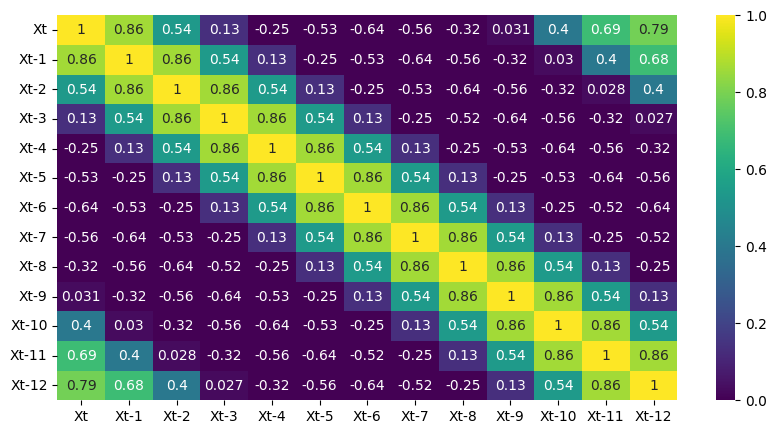

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = S.corr()

import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, cmap='viridis')
plt.show()

In [ ]:
Y_TRAIN = DATA[(DATA.index >= min(S.index)) & (DATA.index <= end)]["PRECIPITATION"]
X_TRAIN = S[S.index <= end]
X_TEST  = S[S.index > end]
random.seed(123)

In [ ]:
xg = xgb.XGBRegressor(learning_rate=0.1,objective ='reg:linear',n_estimators = 100,colsample_bytree = 0.1)
xg.fit(X_TRAIN, Y_TRAIN)
REAL = pd.DataFrame({'YEAR': Y_TRAIN.index.year,'MONTH':Y_TRAIN.index.month, 'STATUS': 'TRAINING','PRECIPITATION':Y_TRAIN.values,'MODEL':xg.predict(X_TRAIN)},columns = ['YEAR','MONTH','STATUS','PRECIPITATION','MODEL'], index = np.arange(len(Y_TRAIN)))
PRED = pd.DataFrame({'YEAR': dates.year,'MONTH':dates.month,'STATUS': 'FORECASTING','PRECIPITATION':np.nan,'MODEL':xg.predict(X_TEST)}, columns = ['YEAR','MONTH','STATUS','PRECIPITATION','MODEL'], index = np.arange(1,n+1,1))
FINAL = pd.concat([REAL,PRED])
FINAL.MODEL = round(FINAL.MODEL.mask(FINAL.MODEL < 0, 0),2)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
<ipython-input-203-bcdb41a869a8>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FINAL = pd.concat([REAL,PRED])


In [ ]:
FINAL

,YEAR,MONTH,STATUS,PRECIPITATION,MODEL
0,1916,1,TRAINING,160.6,97.639999
1,1916,2,TRAINING,112.8,185.429993
2,1916,3,TRAINING,144.0,190.589996
3,1916,4,TRAINING,42.9,109.949997
4,1916,5,TRAINING,30.2,81.349998
...,...,...,...,...,...
2,2021,9,FORECASTING,NaN,28.430000
3,2021,10,FORECASTING,NaN,1.730000
4,2021,11,FORECASTING,NaN,3.400000
5,2021,12,FORECASTING,NaN,34.610001


from matplotlib import pyplot as plt
FINAL['YEAR'].plot(kind='hist', bins=20, title='YEAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
FINAL['MONTH'].plot(kind='hist', bins=20, title='MONTH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
FINAL['PRECIPITATION'].plot(kind='hist', bins=20, title='PRECIPITATION')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
FINAL['MODEL'].plot(kind='hist', bins=20, title='MODEL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
FINAL.groupby('STATUS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
FINAL.plot(kind='scatter', x='YEAR', y='MONTH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
FINAL.plot(kind='scatter', x='MONTH', y='PRECIPITATION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
FINAL.plot(kind='scatter', x='PRECIPITATION', y='MODEL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YEAR']
  ys = series['MONTH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = FINAL.sort_values('YEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR')
_ = plt.ylabel('MONTH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YEAR']
  ys = series['PRECIPITATION']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = FINAL.sort_values('YEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR')
_ = plt.ylabel('PRECIPITATION')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YEAR']
  ys = series['MODEL']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = FINAL.sort_values('YEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR')
_ = plt.ylabel('MODEL')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['YEAR']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'YEAR'}, axis=1)
              .sort_values('YEAR', ascending=True))
  xs = counted['YEAR']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = FINAL.sort_values('YEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
FINAL['YEAR'].plot(kind='line', figsize=(8, 4), title='YEAR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
FINAL['MONTH'].plot(kind='line', figsize=(8, 4), title='MONTH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
FINAL['PRECIPITATION'].plot(kind='line', figsize=(8, 4), title='PRECIPITATION')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
FINAL['MODEL'].plot(kind='line', figsize=(8, 4), title='MODEL')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(FINAL['STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(FINAL, x='YEAR', y='STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(FINAL['STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(FINAL, x='MONTH', y='STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(FINAL['STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(FINAL, x='PRECIPITATION', y='STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(FINAL['STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(FINAL, x='MODEL', y='STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Referencs

Aurélien Géron, 2019.Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edición.

Jason Brownlee, 2016. Machine Learning Mastery with Python, understand your data, Create Accurate Models and Work Projects end-to-end.

# Link: https://www.freecodecamp.org/news/the-ultimate-guide-to-recurrent-neural-networks-in-python/

# Link: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/